In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries 
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [51]:
def reset_seeds(seed=42):
   import os, random, numpy as np, tensorflow as tf
   os.environ['PYTHONHASHSEED']=str(seed)
   np.random.seed(seed) 
   random.seed(seed)
   tf.random.set_seed(seed)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [5]:
X_train.shape

(34799, 32, 32, 3)

In [65]:
y_train.shape, y_train.max(), y_train.min()

((34799,), 42, 0)

36

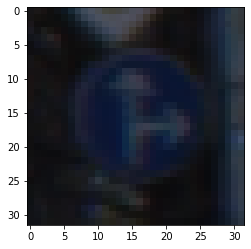

In [7]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

In [8]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [9]:
X_train.max(), X_train.min(), X_train.mean(), X_train.std()

(255, 0, 82.6775890369964, 67.85088842633219)

In [11]:
X_train[0].shape, X_train.shape[0]

((32, 32, 3), 34799)

In [12]:
X_train[0][0][0], X_train[0][0][1]

(array([61, 80, 86], dtype=uint8), array([127, 139, 160], dtype=uint8))

In [13]:
from tensorflow.keras import backend as K
K.image_data_format()

'channels_last'

In [14]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [15]:
X_train_gray.shape, X_test_gray.shape, X_validation_gray.shape

((34799, 32, 32, 1), (12630, 32, 32, 1), (4410, 32, 32, 1))

In [ ]:
# Normalize the data

In [37]:
X_train_gray_norm = X_train_gray/255
X_test_gray_norm = X_test_gray/255
X_validation_gray_norm = X_validation_gray/255

In [39]:
X_train_gray.shape

(34799, 32, 32, 1)

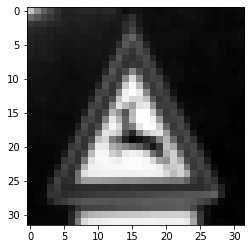

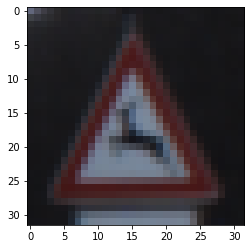

In [67]:
i = 1000
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [42]:
# Import train_test_split from scikit library

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


In [43]:
image_shape = X_train_gray[i].shape

In [ ]:
# Create the CNN model using lenet architecture

In [90]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=1, activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())
cnn_model.add(Dense(units=120, activation='relu'))
cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_11 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_12 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_22 (Dense)             (None, 84)               

In [91]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0005),metrics =['accuracy'])

In [ ]:
# Train the CNN

In [94]:
reset_seeds(42)
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=250,
                        epochs=15,
                        verbose=1,
                        shuffle=True,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/15
140/140 [==============================] - 2s 17ms/step - loss: 0.2390 - accuracy: 0.9425 - val_loss: 0.6438 - val_accuracy: 0.8467
Epoch 2/15
140/140 [==============================] - 2s 17ms/step - loss: 0.2260 - accuracy: 0.9453 - val_loss: 0.6029 - val_accuracy: 0.8415
Epoch 3/15
140/140 [==============================] - 2s 17ms/step - loss: 0.2117 - accuracy: 0.9485 - val_loss: 0.5897 - val_accuracy: 0.8599
Epoch 4/15
140/140 [==============================] - 2s 17ms/step - loss: 0.1944 - accuracy: 0.9532 - val_loss: 0.6145 - val_accuracy: 0.8508
Epoch 5/15
140/140 [==============================] - 2s 17ms/step - loss: 0.1833 - accuracy: 0.9549 - val_loss: 0.6342 - val_accuracy: 0.8444
Epoch 6/15
140/140 [==============================] - 2s 16ms/step - loss: 0.1707 - accuracy: 0.9577 - val_loss: 0.6640 - val_accuracy: 0.8440
Epoch 7/15
140/140 [==============================] - 2s 16ms/step - loss: 0.1590 - accuracy: 0.9615 - val_loss: 0.6378 - val_accuracy: 0.8397

In [ ]:
# Evaluate the model

In [95]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8435


In [ ]:
# Plot the loss & Accuracy

In [96]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

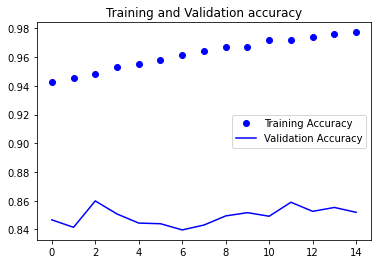

In [97]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


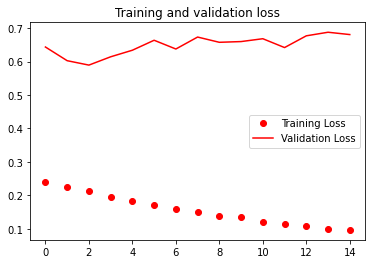

In [98]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [99]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test

<AxesSubplot:>

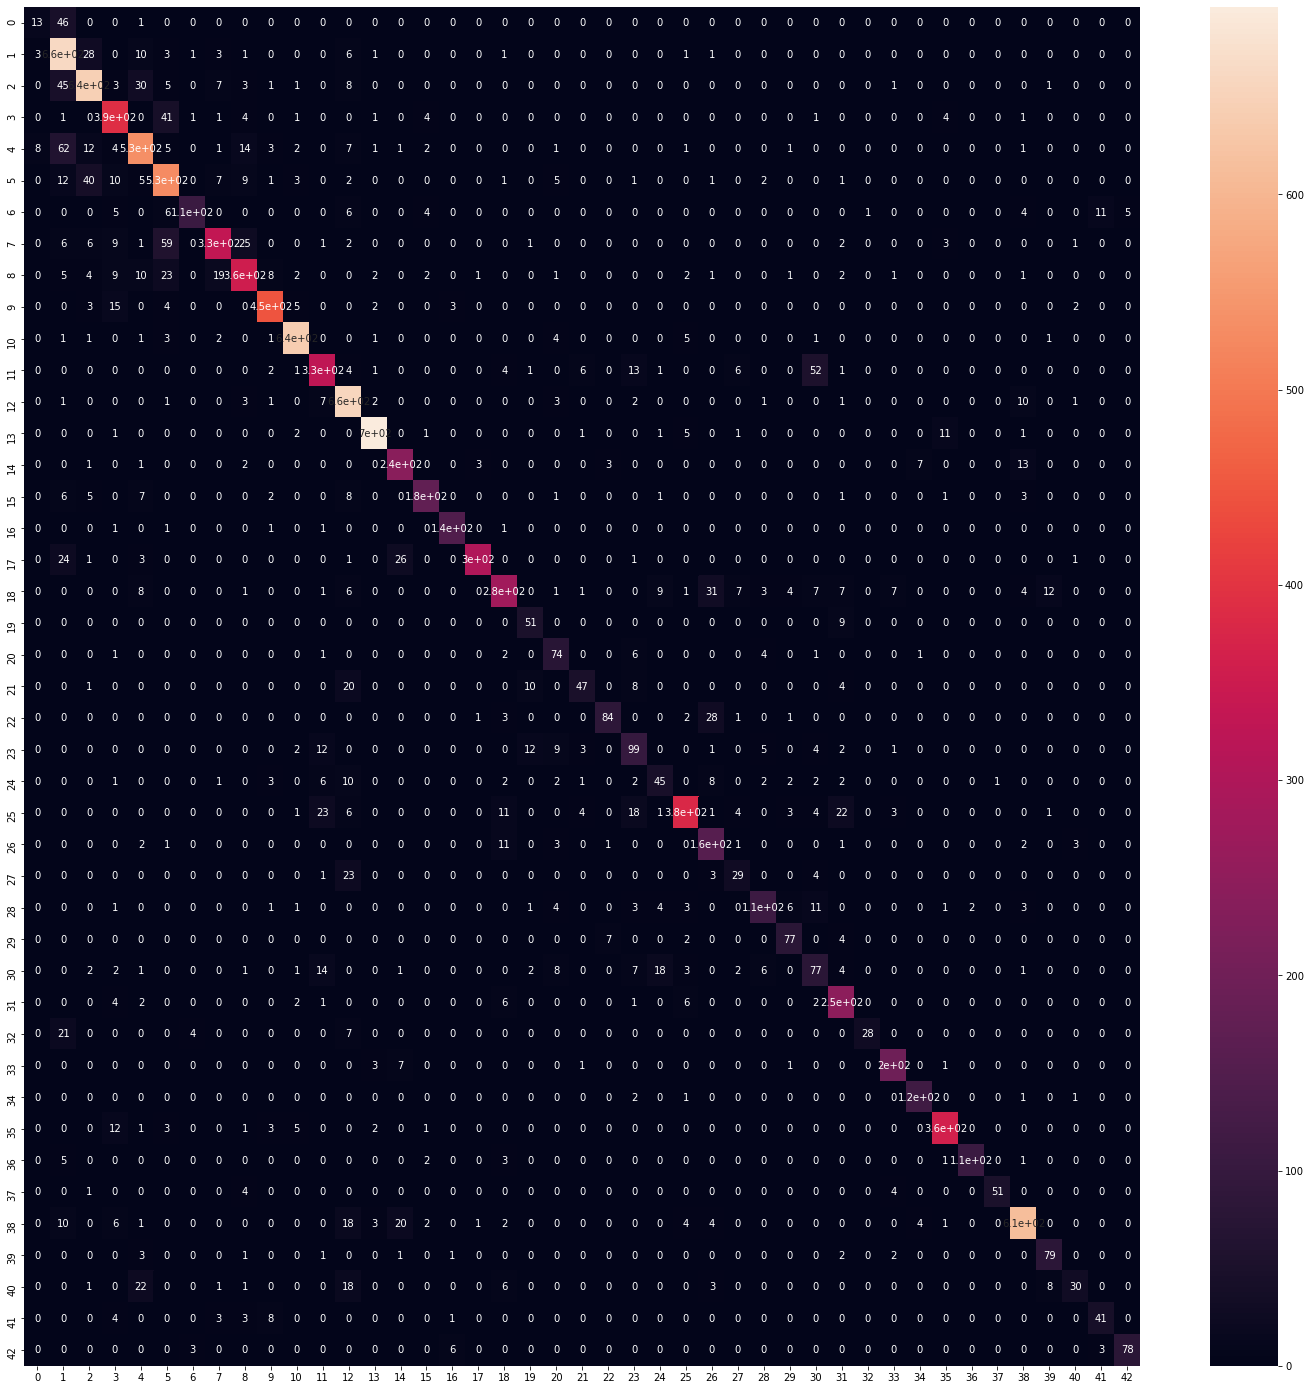

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

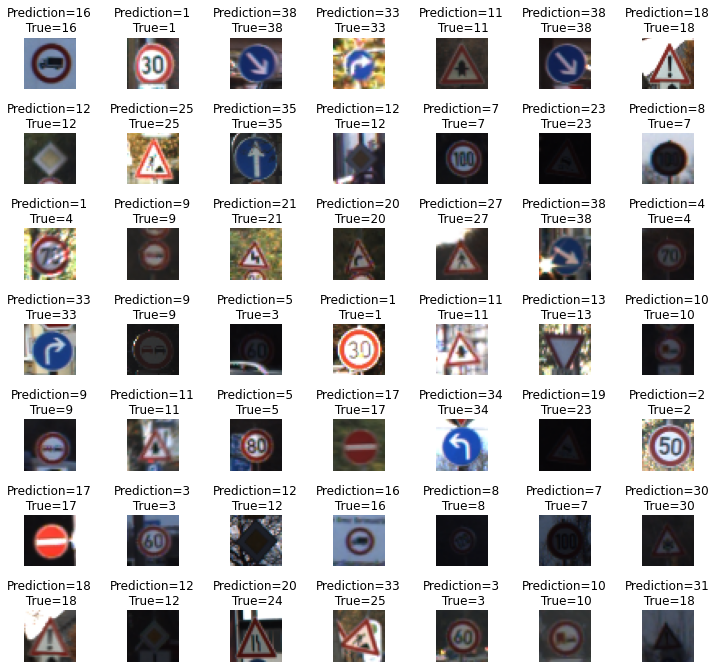

In [101]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)